<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/mutiple_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras import layers,models
from keras.datasets import reuters

### Se importa el dataset

In [3]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


Organizamos los datos, primero con un índice de las palabras

In [ ]:
word_index=reuters.get_word_index()
word_index=dict([(value,key) for (key,value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ -3)) #el -3 se pone porque las primeras 3 palabras son palabras reservadas

In [10]:
train_data.shape

(8982,)

Vemos que la data de entrenamiento no es de tipo tensor, por tanto usaremos la función de vectorización

In [11]:
def vectorizar(sequences,dim=10000):
  results=np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [12]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

In [14]:
train_labels[1]

4

Debemos hacer One hot encoding

In [15]:
from keras.utils import to_categorical

In [17]:
y_train= to_categorical(train_labels)
y_test= to_categorical(test_labels)

In [18]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
model = models.Sequential()
model.add(layers.Dense(65,activation="relu",input_shape=(10000,))) #se debe poner el input al ser la primera capa
model.add(layers.Dense(65,activation="relu"))
model.add(layers.Dense(46,activation="softmax")) #46 neuronas porque son 46 diferentes categorías, lo cual es beneficioso
#La activación de la última capa se hizo de tipo softmax debido a que esta activación es bastante util con la clasificación múltiple



Compilamos el modelo

In [40]:
#la funcion de pérdida usada es especial para la clasificación múltiple
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Se realiza la partición de los datos

In [41]:
x_val = x_train[:1000]
partial_x_train= x_train[1000:]

y_val = y_train[:1000]
partial_y_train= y_train[1000:]


In [32]:
history=model.fit(partial_x_train,partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/30
16/16 [==============================] - 2s 106ms/step - loss: 2.9208 - accuracy: 0.4812 - val_loss: 1.9532 - val_accuracy: 0.6280
Epoch 2/30
16/16 [==============================] - 2s 95ms/step - loss: 1.6319 - accuracy: 0.6793 - val_loss: 1.4473 - val_accuracy: 0.6900
Epoch 3/30
16/16 [==============================] - 1s 62ms/step - loss: 1.2261 - accuracy: 0.7444 - val_loss: 1.2251 - val_accuracy: 0.7390
Epoch 4/30
16/16 [==============================] - 1s 54ms/step - loss: 0.9908 - accuracy: 0.7955 - val_loss: 1.1203 - val_accuracy: 0.7630
Epoch 5/30
16/16 [==============================] - 1s 55ms/step - loss: 0.8174 - accuracy: 0.8291 - val_loss: 1.0164 - val_accuracy: 0.8010
Epoch 6/30
16/16 [==============================] - 1s 56ms/step - loss: 0.6840 - accuracy: 0.8572 - val_loss: 0.9978 - val_accuracy: 0.8010
Epoch 7/30
16/16 [==============================] - 1s 56ms/step - loss: 0.5731 - accuracy: 0.8802 - val_loss: 0.9272 - val_accuracy: 0.8150
Epoch 8/30
1

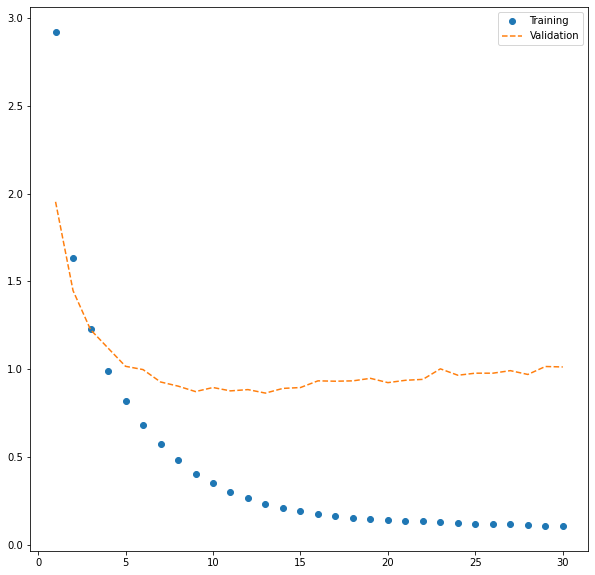

In [33]:
import matplotlib.pyplot as plt

#Obtenemos un diccionario del cambio de los valores en el entrenamiento
history_dict=history.history

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

fig=plt.figure(figsize=(10,10))
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="Training")
plt.plot(epoch,val_loss_values,"--",label="Validation")
plt.legend()
plt.show()

Podemos ver que despues hay una gran diferencia en la pérdida de los valores de validación con la pérdida lo cual nos indica que nuestro modelo esta presentando Overfitting, donde nuestra red se aprende los valores de validación

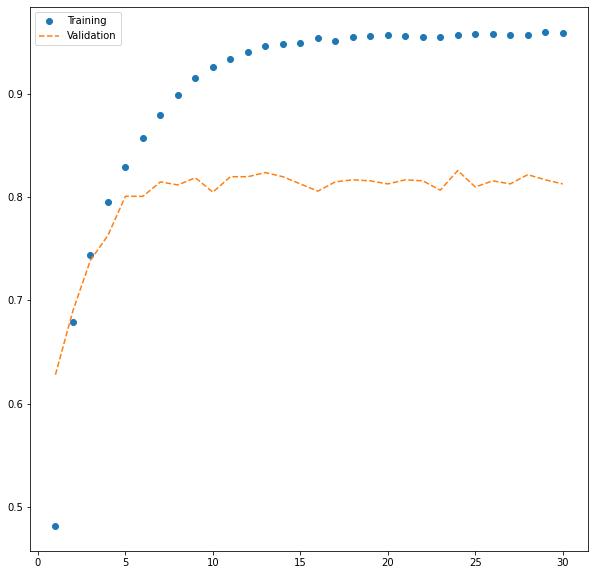

In [34]:
history_dict=history.history

accuracy_values=history_dict["accuracy"]
val_accuracy_values=history_dict["val_accuracy"]

fig=plt.figure(figsize=(10,10))
epoch=range(1,len(loss_values)+1)
plt.plot(epoch,accuracy_values,"o",label="Training")
plt.plot(epoch,val_accuracy_values,"--",label="Validation")
plt.legend()
plt.show()

Aca tambien vemos lo mismo, el accuracy de training casi perfecto, mientras que la validación parece estancarse en un determinado punto

In [35]:
# al ver que el modelo presenta el overfitting despues de la epoca 9
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1238 - accuracy: 0.7912


[1.123759388923645, 0.7911843061447144]

Se entrenará otro modelo con solo 9 épocas para analizar el cambio

In [42]:
history2=model.fit(partial_x_train,partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 2s 90ms/step - loss: 2.7301 - accuracy: 0.4093 - val_loss: 1.8944 - val_accuracy: 0.6060
Epoch 2/9
16/16 [==============================] - 2s 102ms/step - loss: 1.5765 - accuracy: 0.6700 - val_loss: 1.3755 - val_accuracy: 0.7010
Epoch 3/9
16/16 [==============================] - 1s 87ms/step - loss: 1.1949 - accuracy: 0.7437 - val_loss: 1.1892 - val_accuracy: 0.7310
Epoch 4/9
16/16 [==============================] - 1s 55ms/step - loss: 0.9800 - accuracy: 0.7909 - val_loss: 1.0736 - val_accuracy: 0.7670
Epoch 5/9
16/16 [==============================] - 1s 52ms/step - loss: 0.8094 - accuracy: 0.8232 - val_loss: 1.0017 - val_accuracy: 0.7790
Epoch 6/9
16/16 [==============================] - 1s 54ms/step - loss: 0.6759 - accuracy: 0.8529 - val_loss: 0.9705 - val_accuracy: 0.7760
Epoch 7/9
16/16 [==============================] - 1s 59ms/step - loss: 0.5641 - accuracy: 0.8807 - val_loss: 0.9106 - val_accuracy: 0.8170
Epoch 8/9
16/16 [==

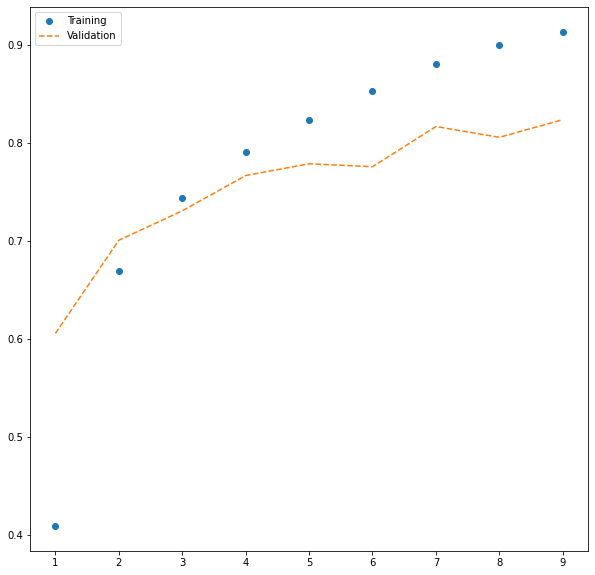

In [43]:
history2_dict=history2.history

accuracy_values2=history2_dict["accuracy"]
val_accuracy_values2=history2_dict["val_accuracy"]

fig=plt.figure(figsize=(10,10))
epoch=range(1,len(accuracy_values2)+1)
plt.plot(epoch,accuracy_values2,"o",label="Training")
plt.plot(epoch,val_accuracy_values2,"--",label="Validation")
plt.legend()
plt.show()

In [44]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9540 - accuracy: 0.7907


[0.9540107846260071, 0.790739119052887]

Vemos que efectivamente presentamos una mejoría aunque pequeña, en el accuracy del modelo, por tanto no siempre es mejor evaluar a mayor cantidad de épocas


### Por tanto efectuaremos una regularización